In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
raw_data = pd.read_csv("Country-data.csv")
raw_data
# data = raw_data.iloc[:,1:]
data = raw_data[['child_mort', 'imports', 'gdpp']]

In [20]:
scaler = StandardScaler()
transform_data = scaler.fit_transform(data)

In [47]:
epsilon_neighborhood = 2
min_pts =5

In [48]:
dbscan = DBSCAN(eps = epsilon_neighborhood, min_samples = min_pts)
labels = dbscan.fit_predict(transform_data)
data['dbscan_cluster'] = labels
data['country'] = raw_data['country']
print('Cluster:',np.unique(labels))
print('Clusters Size:',np.bincount(labels + 1))
data.to_csv('country_nim.csv')

Cluster: [-1  0]
Clusters Size: [  2 165]


/var/folders/d4/1nz2q1z11m73j7sggrq4l8l00000gn/T/ipykernel_35946/2573757562.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dbscan_cluster'] = labels
/var/folders/d4/1nz2q1z11m73j7sggrq4l8l00000gn/T/ipykernel_35946/2573757562.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['country'] = raw_data['country']


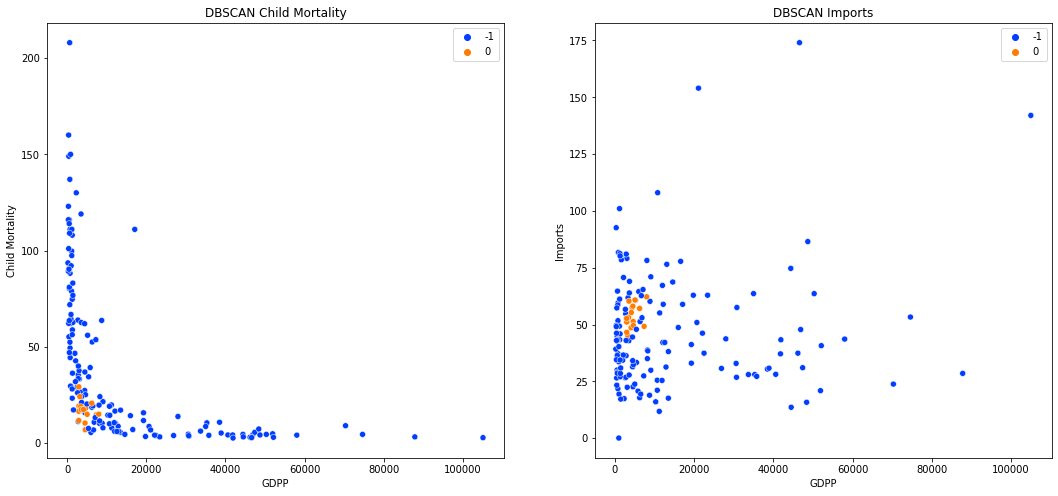

In [73]:
plt.figure(figsize = (18,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = data, hue = 'dbscan_cluster', palette = 'bright')
plt.legend(loc = 1)
plt.title('DBSCAN Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'gdpp', y = 'imports', data = data, hue = 'dbscan_cluster', palette = 'bright')
plt.legend(loc = 1)
plt.title('DBSCAN Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')
plt.show()